[View in Colaboratory](https://colab.research.google.com/github/swastikmhptr/swastikmhptr.github.io/blob/master/IIsc_Assignment.ipynb)

## Fizz Buzz Logic ##



## Model To Classify a number according to Fizz-Buzz Logic##

Here i have implemented the complete Neural netowrk from scratch with the parameters specified and while only importing Numpy for fast operation

**Libraries used:-**
- numpy is the fundamental package for scientific computing with Python..
- matplotlib is a famous library to plot graphs in Python.



In [0]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

**Creation Of The Fizz-Buzz Dataset**

In [56]:
arr = np.zeros((1000,13))
p = 1;
for i in range(1000):
  arr[i][0]=p
  if (p%3==0 and p%5==0):
    arr[i][1]=3
  elif p%3==0:
    arr[i][1]=1
  elif p%5==0:
    arr[i][1]=2
  else:
    arr[i][1]=0
  
  arr[i][2]=np.base_repr(p)
  q=arr[i][2]
  for j in range(12,2,-1):
    arr[i][j]=np.around(q%10)
    q=q/10
  p=p+1
print(arr)

[[1.00000000e+00 0.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [2.00000000e+00 0.00000000e+00 1.00000000e+01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [3.00000000e+00 1.00000000e+00 1.10000000e+01 ... 0.00000000e+00
  1.00000000e+00 1.00000000e+00]
 ...
 [9.98000000e+02 0.00000000e+00 1.11110011e+09 ... 1.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [9.99000000e+02 1.00000000e+00 1.11110011e+09 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [1.00000000e+03 2.00000000e+00 1.11110100e+09 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


Now since the dataset is created, columns 1 and 3 are removed

In [57]:
arr1=np.zeros((1000,11))
arr1=np.delete(arr,[0,2], 1)

print("final array \n")
print(arr1)

final array 

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 [2. 1. 1. ... 0. 0. 0.]]


**Splitting the data into required Train and Validation datasets**

In [0]:
split = 100
df = arr1[:split,:]
dt = arr1[split:,:]

In [60]:
train = np.zeros((900,11))
train[:] = dt[:]
print(train)

[[0. 0. 0. ... 1. 0. 1.]
 [1. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 [2. 1. 1. ... 0. 0. 0.]]


In [61]:
test = np.zeros((100,11))
test[:] = df[:]
print(test)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 1.]
 [2. 0. 0. ... 1. 0. 0.]]


In [62]:
print("test"+ str(test.shape))
print("train"+ str(train.shape))

test(100, 11)
train(900, 11)


**separating the prediction value y from train and test datasets**

In [63]:
Y_test1 = np.zeros((100,1))

Y_test1[:] = test[:,[0]]
Y_test2 = np.copy(Y_test1.T.astype(int))
print(Y_test2)

[[0 0 1 0 2 1 0 0 1 2 0 1 0 0 3 0 0 1 0 2 1 0 0 1 2 0 1 0 0 3 0 0 1 0 2 1
  0 0 1 2 0 1 0 0 3 0 0 1 0 2 1 0 0 1 2 0 1 0 0 3 0 0 1 0 2 1 0 0 1 2 0 1
  0 0 3 0 0 1 0 2 1 0 0 1 2 0 1 0 0 3 0 0 1 0 2 1 0 0 1 2]]


**One-Hot Encoding the Test Target feature**

In [64]:
Y_test = np.zeros((100,4))
Y_test[np.arange(100),Y_test2]=1
print(Y_test)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0.

In [65]:
Y_train1 = np.zeros((900,1))

Y_train1[:] = train[:,[0]]
Y_train2 = np.copy(Y_train1.T.astype(int))
print(Y_train2)

[[0 1 0 0 3 0 0 1 0 2 1 0 0 1 2 0 1 0 0 3 0 0 1 0 2 1 0 0 1 2 0 1 0 0 3 0
  0 1 0 2 1 0 0 1 2 0 1 0 0 3 0 0 1 0 2 1 0 0 1 2 0 1 0 0 3 0 0 1 0 2 1 0
  0 1 2 0 1 0 0 3 0 0 1 0 2 1 0 0 1 2 0 1 0 0 3 0 0 1 0 2 1 0 0 1 2 0 1 0
  0 3 0 0 1 0 2 1 0 0 1 2 0 1 0 0 3 0 0 1 0 2 1 0 0 1 2 0 1 0 0 3 0 0 1 0
  2 1 0 0 1 2 0 1 0 0 3 0 0 1 0 2 1 0 0 1 2 0 1 0 0 3 0 0 1 0 2 1 0 0 1 2
  0 1 0 0 3 0 0 1 0 2 1 0 0 1 2 0 1 0 0 3 0 0 1 0 2 1 0 0 1 2 0 1 0 0 3 0
  0 1 0 2 1 0 0 1 2 0 1 0 0 3 0 0 1 0 2 1 0 0 1 2 0 1 0 0 3 0 0 1 0 2 1 0
  0 1 2 0 1 0 0 3 0 0 1 0 2 1 0 0 1 2 0 1 0 0 3 0 0 1 0 2 1 0 0 1 2 0 1 0
  0 3 0 0 1 0 2 1 0 0 1 2 0 1 0 0 3 0 0 1 0 2 1 0 0 1 2 0 1 0 0 3 0 0 1 0
  2 1 0 0 1 2 0 1 0 0 3 0 0 1 0 2 1 0 0 1 2 0 1 0 0 3 0 0 1 0 2 1 0 0 1 2
  0 1 0 0 3 0 0 1 0 2 1 0 0 1 2 0 1 0 0 3 0 0 1 0 2 1 0 0 1 2 0 1 0 0 3 0
  0 1 0 2 1 0 0 1 2 0 1 0 0 3 0 0 1 0 2 1 0 0 1 2 0 1 0 0 3 0 0 1 0 2 1 0
  0 1 2 0 1 0 0 3 0 0 1 0 2 1 0 0 1 2 0 1 0 0 3 0 0 1 0 2 1 0 0 1 2 0 1 0
  0 3 0 0 1 0 2 1 0 0 1 2 0 1 0 0 3 0 

**ONe Hot Encoding the Train Target Feature**

In [66]:
Y_train = np.zeros((900,4))
Y_train[np.arange(900),Y_train2]=1
print(Y_train)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


**Deleting the Y values from the X-train and X-Test**

In [0]:
X_test = np.zeros((100,10))
X_train = np.zeros((900,10))

X_test = np.delete(test,0,axis=1)
X_train = np.delete(train,0,axis=1)

In [68]:
print(X_test)
print("test:"+ str(X_test.shape))
print(X_train)
print("Train:"+ str(X_train.shape))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 0.]
 [0. 0. 0.

**Transposing the final datasets**

In [0]:

X_train_final = np.zeros((10,900))
X_test_final = np.zeros((10,100))
Y_train_final = np.zeros((4,900))
Y_test_final = np.zeros((4,100))

X_train_final = np.transpose(X_train)
X_test_final = np.transpose(X_test)
Y_train_final = np.transpose(Y_train)
Y_test_final = np.transpose(Y_test)

In [70]:
print(X_train_final[:][:])

[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 0.]
 [0. 1. 1. ... 1. 1. 0.]
 [1. 0. 1. ... 0. 1. 0.]]


**NORMALISING the training and Validation data**

Here Normalization has been skipped because the complete dataset is made up of boolean values

In [0]:
#mtr = X_train_final.shape[1]
#print(mtr)
#utr = np.sum(X_train_final,axis=1,keepdims=True)/mtr
#print(utr)

In [0]:
#train_set_x = X_train_final - utr
#test_set_x = X_test_final - utr

In [0]:
#norm = (np.sum(np.square(train_set_x),axis=1,keepdims=True))/mtr

#train_set_x = train_set_x / norm
#test_set_x = test_set_x / norm

In [0]:
#print(train_set_x)
#print("train:"+ str(train_set_x.shape))
#print(test_set_x)
#print("Test:"+ str(test_set_x.shape))

# Activation Functions

**Defininhg Sigmoid activation function**

In [0]:
def sigmoid(z):
   
    s = 1 / (1 + np.exp(-z))
    
    return s

In [0]:
def sigmoiderivative(Z):
  
  f = Z * (1-Z)
  
  return f

**function for tanh activation**

In [0]:
def tanh(z):
    
    s = (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))
    
    return s

**derivative of tanh activation**

In [0]:
def tanhderivative(x):
    
    p = 1 - np.square(x)
    
    return p

**function for RELU activation**

In [0]:
def relu(z):
    
    s = np.maximum(0,z)
    
    return s

**derivative of RELU activation**

In [0]:
def reluderivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x


Next the softmax function is defined which helps in the multi-class classification as we have for this problem

In [0]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x)
    return np.exp(x) / np.sum(e_x,axis=0)

# Core functions

**Initialising the Weights and bais with very small values **

In [0]:
def initialize(layer):
    
    l = len(layer)
    parameters = {}
    np.random.seed(0)
    for i in range(1,l-1):
      parameters["W"+str(i)]=np.random.randn(layer[i],layer[i-1]) * np.sqrt(2/layer[i-1]) 
      parameters["b"+str(i)]=np.zeros((layer[i],1))
    
    parameters["W"+str(l-1)]=np.random.randn(layer[l-1],layer[l-2]) * 0.001
    parameters["b"+str(l-1)]=np.zeros((layer[l-1],1)) 
   
    
    return parameters

**Initialising parameters for ADAM Optimiser**

Just for the cases if application of Mini Batch Gradient Descent is applied

In [0]:
def initialize_adam(parameters,layer) :
    
    L = len(parameters) // 2
    v = {}
    s = {}
    
   
    for l in range(L-1):
   
        v["dW" + str(l+1)] = np.zeros(parameters['W' + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters['b' + str(l+1)].shape)
        s["dW" + str(l+1)] = np.zeros(parameters['W' + str(l+1)].shape)
        s["db" + str(l+1)] = np.zeros(parameters['b' + str(l+1)].shape)
    
    
    return v, s

**Breaking the training dataset with random minibatches**

This function has been used to split our given dataset of 1000 entries into smaller batches for min-Batch Gradient Descent if needed

In [0]:
def random_mini_batches(X, Y, mini_batch_size = 512):
    
               
    m = X.shape[1]                  
    mini_batches = []
        
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((4,m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k*mini_batch_size : (k+1)*mini_batch_size]
      
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        
        mini_batch_X = shuffled_X[:, num_complete_minibatches*mini_batch_size:]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches*mini_batch_size:]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

**FORWARD PROPAGATION**

Function for general Forward propagation without application of dropouts

In [0]:
def fwd_propagation(X,parameters,layer):
  
  l = len(layer)
  forward = {}
  
  forward["Z"+str(1)]=np.dot(parameters["W"+str(1)],X)+parameters["b"+str(1)]
    
  forward["A"+str(1)]=relu(forward["Z"+str(1)])
  
  for i in range(2,l-1):
    forward["Z"+str(i)]=np.dot(parameters["W"+str(i)],forward["A"+str(i-1)])+parameters["b"+str(i)]
    forward["A"+str(i)]=relu(forward["Z"+str(i)])
   
  forward["Z"+str(l-1)]=np.dot(parameters["W"+str(l-1)],forward["A"+str(l-2)])+parameters["b"+str(l-1)]
  forward["A"+str(l-1)]=sigmoid(forward["Z"+str(l-1)])
  
  return forward

**FORWARD-PROPAGATION with DROPOUTS**

Function to implement forward propagation with the application of dropouts

In [0]:
def fwd_propagation_drop(X,parameters,layer,keep_prob):
  drop = {}
  l = len(layer)
  forward = {}
  
  forward["Z"+str(1)]=np.dot(parameters["W"+str(1)],X)+parameters["b"+str(1)]
    
  forward["A"+str(1)]=relu(forward["Z"+str(1)])
  drop["d"+str(1)]=(np.random.rand(forward["A"+str(1)].shape[0],forward["A"+str(1)].shape[1])) < keep_prob[1]
    
  forward["A"+str(1)] = np.multiply(forward["A"+str(1)],drop["d"+str(1)])
  forward["A"+str(1)] = forward["A"+str(1)] / keep_prob[1]
  
  for i in range(2,l-1):
    forward["Z"+str(i)]=np.dot(parameters["W"+str(i)],forward["A"+str(i-1)])+parameters["b"+str(i)]
    
    forward["A"+str(i)]=relu(forward["Z"+str(i)])
    drop["d"+str(i)]=(np.random.rand(forward["A"+str(i)].shape[0],forward["A"+str(i)].shape[1])) < keep_prob[i]
    
    forward["A"+str(i)] = np.multiply(forward["A"+str(i)],drop["d"+str(i)])
    forward["A"+str(i)] = forward["A"+str(i)] / keep_prob[i]
    
  forward["Z"+str(l-1)]=np.dot(parameters["W"+str(l-1)],forward["A"+str(l-2)])+parameters["b"+str(l-1)]
  forward["A"+str(l-1)]=softmax(forward["Z"+str(l-1)])
  
  return forward

**BACK_PROPATION WITH L2 Regularization**

This function is tackle the case when there is less validation accuracy

In [0]:
def back_prop(X,Y,forward,layer,parameters,lambd=0.6):
  m = X.shape[1]
  l = len(layer)
  grads = {}
  
  grads["dz"+str(l-1)]= forward["A"+str(l-1)] - Y
  grads["dw"+str(l-1)]=(np.dot(grads["dz"+str(l-1)],forward["A"+str(l-2)].T) / m) + ((lambd/m)*parameters["W"+str(l-1)])
  grads["db"+str(l-1)]=np.sum(grads["dz"+str(l-1)],axis=1,keepdims=True) / m 
  grads["da"+str(l-2)]=np.dot(parameters["W"+str(l-1)].T,grads["dz"+str(l-1)])
  
  for i in range(l-2,1,-1):
    grads["dz"+str(i)]=grads["da"+str(i)]*reluderivative(forward["A"+str(i)])
    grads["dw"+str(i)]=(np.dot(grads["dz"+str(i)],forward["A"+str(i-1)].T) / m) + ((lambd/m)*parameters["W"+str(i)])
    grads["db"+str(i)]=np.sum(grads["dz"+str(i)],axis=1,keepdims=True)/m
    grads["da"+str(i-1)]=np.dot(parameters["W"+str(i)].T,grads["dz"+str(i)])
  
  grads["dz"+str(1)]=grads["da"+str(1)]*reluderivative(forward["A"+str(1)])
  grads["dw"+str(1)]=np.dot(grads["dz"+str(1)],X.T)/m + ((lambd/m)*parameters["W"+str(1)])

  grads["db"+str(1)]=np.sum(grads["dz"+str(1)],axis=1,keepdims=True)/m
    
  return grads

**function to update the weights and Bais**

Gradient Descent Updation of Weights and Bias

In [0]:
def optimise(parameters,grads,layer,learning_rate=0.01):
  l= len(layer)
  
  for i in range(1,l):
    parameters["W"+str(i)]=parameters["W"+str(i)] - (learning_rate * grads["dw"+str(i)])
    parameters["b"+str(i)]=parameters["b"+str(i)] - (learning_rate * grads["db"+str(i)])
  
  return parameters


**Updating parameters with ADAM optimizer**

Function to optimise parameters if adams Optimizer is choosen to be used

In [0]:
def update_parameters_with_adam(parameters, grads, layer, v, s, t, learning_rate = 0.01, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    
    for l in range(L-1):
       
        v["dW" + str(l+1)] = beta1 * v['dW' + str(l+1)] + (1-beta1) * grads['dw' + str(l+1)]
        v["db" + str(l+1)] = beta1 * v['db' + str(l+1)] + (1-beta1) * grads['db' + str(l+1)]
       
        v_corrected["dw" + str(l+1)] = v['dW' + str(l+1)] / (1 - np.power(beta1, t))
        v_corrected["db" + str(l+1)] = v['db' + str(l+1)] / (1 - np.power(beta1, t))
       

        s["dW" + str(l+1)] = beta2 * s['dW' + str(l+1)] + (1-beta2) * np.power(grads['dw' + str(l+1)], 2)
        s["db" + str(l+1)] = beta2 * s['db' + str(l+1)] + (1-beta2) * np.power(grads['db' + str(l+1)], 2)
        
        s_corrected["dw" + str(l+1)] = s['dW' + str(l+1)] / (1 - np.power(beta2, t))
        s_corrected["db" + str(l+1)] = s['db' + str(l+1)] / (1 - np.power(beta2, t))
       
        parameters["W" + str(l+1)] = parameters['W' + str(l+1)] - learning_rate * v_corrected['dw' + str(l+1)] / np.sqrt(s_corrected['dw' + str(l+1)] + epsilon)
        parameters["b" + str(l+1)] = parameters['b' + str(l+1)] - learning_rate * v_corrected['db' + str(l+1)] / np.sqrt(s_corrected['db' + str(l+1)] + epsilon)
       
    return parameters, v, s

**function to predict result**

In [0]:
def predict(X,parameters,layers):
  l= len(layer)
  fwd = fwd_propagation(X,parameters,layers)
  
  Y1 = fwd["A"+str(l-1)]
  Y2=np.argmax(Y1,axis=0)
  
  return Y2

**Function to retieve total cost for an epoch using cross-entropy loss function**

In [0]:
def calculate_cost(Y,forward,parameters,layer,lambd=0.6):
  l= len(layer)
  m=Y.shape[1]
  
  cost = (-1 * np.sum((Y * np.log(forward["A"+str(l-1)])) + (1 - Y) * np.log(1 - forward["A"+str(l-1)])) / m) + ((lambd/(2*m))*np.sum(np.square(parameters["W"+str(l-1)])))
  
  return cost

**Final model with all functions merged**

In [0]:
def model(X_train,Y_train, X_test, Y_test, layer, keep_prob,mini_batch_size=512, beta1=0.0, beta2=0.0, learning_rate=0.001, iterations = 1500, lambd=0.6):
  costs = []
  
  parameters = initialize(layer)
  v, s = initialize_adam(parameters,layer)
  t = 0
  
  for j in range(iterations):
  
    minibatches = random_mini_batches(X_train,Y_train,mini_batch_size)
    
    for minibatch in minibatches:
      (minibatch_x,minibatch_y) = minibatch
      
      forward = fwd_propagation_drop(minibatch_x,parameters,layer,keep_prob)
      
      cost = calculate_cost(minibatch_y,forward,parameters,layer,lambd)
      grads = back_prop(minibatch_x,minibatch_y,forward,layer,parameters,lambd)
      t=t+1
      parameters,v,s = update_parameters_with_adam(parameters, grads, layer, v, s, t, learning_rate,beta1, beta2)
    
    
    if j % 10 == 0:
      costs.append(cost)
    
    if j%100 == 0:
      print ("Cost after iteration %i: %f" %(j , cost))
    #if j == 100:
      #par = parameters[:]
      
  Y_prediction_train = predict(X_train,parameters,layer)
  Y_prediction_test = predict(X_test,parameters,layer)

  #abb = np.mean(np.abs(Y_prediction_train - Y_train2)) * 100
  #abc = np.mean(np.abs(Y_prediction_test - Y_test2)) * 100
 # print("train accuracy: {} %".format(100 - abb))
 # print("test accuracy: {} %".format(100 - abc))
  
  return parameters, grads, forward, costs, Y_prediction_test, Y_prediction_train

# Training of model

**The Model is trained with two scenarios:-**

**1) First one is as per the parameter values provided in the assignment**

**2) Second is the most optimal found results**

##Scenario1

**Here as per the parameter values given we have taken only one hidden layer with 100 neurons and no dropouts or Regularization is done, it also follows the whole batck gradient Descent Approach**

In [143]:
layer = [10,100,4] #to set number of layers and the number of nodes in hidden layers (here there is only one hidden layer with 100 neurons)
keep_prob = [1.0,1.0,1.0] #To set dropout probabilities for each layer (No dropout is used here)
para,grd,ford,cst,test,train1 = model(X_train_final, Y_train_final, X_test_final, Y_test_final, layer, keep_prob, mini_batch_size=900, beta1=0.0, beta2=0.0, learning_rate = 0.5, iterations = 22000, lambd = 0.0 )

Cost after iteration 0: 2.247486
Cost after iteration 100: 1.916654
Cost after iteration 200: 1.912270
Cost after iteration 300: 1.909525
Cost after iteration 400: 1.907662
Cost after iteration 500: 1.906309
Cost after iteration 600: 1.905277
Cost after iteration 700: 1.904402
Cost after iteration 800: 1.903682
Cost after iteration 900: 1.903002
Cost after iteration 1000: 1.902374
Cost after iteration 1100: 1.901809
Cost after iteration 1200: 1.901220
Cost after iteration 1300: 1.900672
Cost after iteration 1400: 1.900131
Cost after iteration 1500: 1.899607
Cost after iteration 1600: 1.899098
Cost after iteration 1700: 1.898579
Cost after iteration 1800: 1.898065
Cost after iteration 1900: 1.897584
Cost after iteration 2000: 1.897098
Cost after iteration 2100: 1.896607
Cost after iteration 2200: 1.896144
Cost after iteration 2300: 1.895662
Cost after iteration 2400: 1.895199
Cost after iteration 2500: 1.894735
Cost after iteration 2600: 1.894276
Cost after iteration 2700: 1.893826
Cost

Cost after iteration 7400: 1.874458
Cost after iteration 7500: 1.874094
Cost after iteration 7600: 1.873726
Cost after iteration 7700: 1.873355
Cost after iteration 7800: 1.872997
Cost after iteration 7900: 1.872625
Cost after iteration 8000: 1.872269
Cost after iteration 8100: 1.871901
Cost after iteration 8200: 1.871543
Cost after iteration 8300: 1.871189
Cost after iteration 8400: 1.870848
Cost after iteration 8500: 1.870484
Cost after iteration 8600: 1.870127
Cost after iteration 8700: 1.869773
Cost after iteration 8800: 1.869413
Cost after iteration 8900: 1.869051
Cost after iteration 9000: 1.868708
Cost after iteration 9100: 1.868367
Cost after iteration 9200: 1.868028
Cost after iteration 9300: 1.867684
Cost after iteration 9400: 1.867343
Cost after iteration 9500: 1.867004
Cost after iteration 9600: 1.866672
Cost after iteration 9700: 1.866331
Cost after iteration 9800: 1.866006
Cost after iteration 9900: 1.865673
Cost after iteration 10000: 1.865335
Cost after iteration 10100:

Cost after iteration 14700: 1.848292
Cost after iteration 14800: 1.847910
Cost after iteration 14900: 1.847407
Cost after iteration 15000: 1.847008
Cost after iteration 15100: 1.846652
Cost after iteration 15200: 1.846263
Cost after iteration 15300: 1.845882
Cost after iteration 15400: 1.845497
Cost after iteration 15500: 1.845103
Cost after iteration 15600: 1.844674
Cost after iteration 15700: 1.844317
Cost after iteration 15800: 1.843895
Cost after iteration 15900: 1.843454
Cost after iteration 16000: 1.843046
Cost after iteration 16100: 1.842659
Cost after iteration 16200: 1.842228
Cost after iteration 16300: 1.841719
Cost after iteration 16400: 1.841391
Cost after iteration 16500: 1.841033
Cost after iteration 16600: 1.840743
Cost after iteration 16700: 1.840360
Cost after iteration 16800: 1.839973
Cost after iteration 16900: 1.839653
Cost after iteration 17000: 1.839312
Cost after iteration 17100: 1.838983
Cost after iteration 17200: 1.838612
Cost after iteration 17300: 1.838291
C

In [144]:
print(test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [145]:
#for test set
exam = np.zeros((1,100))
exam1 = np.zeros((1,100))
exam2 = np.zeros((1,100))
exam3 = np.zeros((1,100))
exam = train1 - Y_train2
exam1 = test - Y_test2
exam1[exam1!=0]=1
exam[exam!=0]=1

fp_train = np.sum(exam)
fp_test = np.sum(exam1)

corr_train = 900-fp_train
corr_test = 100-fp_test
accu_train = (corr_train/900)*100
accu_test = (corr_test/100)*100

print("true positive for train= "+ str(corr_train))
print("true positive for test= "+ str(corr_test))
print("Training Set Accuracy = "+ str(accu_train)+"%")
print("Test Set Accuracy = "+ str(accu_test)+"%")



true positive for train= 483
true positive for test= 53
Training Set Accuracy = 53.666666666666664%
Test Set Accuracy = 53.0%


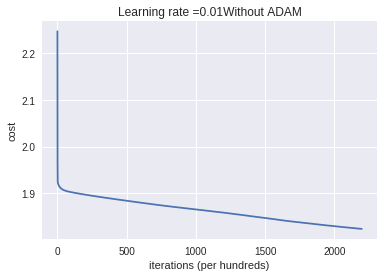

In [146]:
costs = np.squeeze(cst)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(0.01)+"Without ADAM")
plt.show()

##Results Observed

** The training of the model takes too many iterations and the accuracy value obtained is really low**

##Scenario 2

**Here the Parameters are optimised in a trial and error format to obtain the maximum accuracy, Here The network has 3 hidden layers with 40,25,and 15 neurons respectively and Droputs is used along with mini-batch Gradient Descent while Adam's Optimization is used to Minimise the cost fluctuation in Mini-Batch Gradient Descent**

In [111]:
layer = [10,40,25,15,4] #to set number of layers and the number of nodes in hidden layers
keep_prob = [1.0,1.0,0.8,0.7,1.0] #To set dropout probabilities for each layer
para,grd,ford,cst,test,train1 = model(X_train_final, Y_train_final, X_test_final, Y_test_final, layer, keep_prob, mini_batch_size=64, beta1=0.9, beta2=0.99, learning_rate = 0.01, iterations = 2300, lambd = 0.0 ) 

Cost after iteration 0: 2.239360
Cost after iteration 100: 2.782453
Cost after iteration 200: 2.011477
Cost after iteration 300: 0.853013
Cost after iteration 400: 0.420394
Cost after iteration 500: 1.202766
Cost after iteration 600: 0.634106
Cost after iteration 700: 1.485248
Cost after iteration 800: 0.090717
Cost after iteration 900: 0.007900
Cost after iteration 1000: 0.063177
Cost after iteration 1100: 0.003229


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


Cost after iteration 1200: 1.392841
Cost after iteration 1300: 0.194062
Cost after iteration 1400: 0.211843
Cost after iteration 1500: 0.068209
Cost after iteration 1600: 0.559016
Cost after iteration 1700: 1.692567
Cost after iteration 1800: 0.164614
Cost after iteration 1900: 0.002012
Cost after iteration 2000: 0.006288
Cost after iteration 2100: 0.570533
Cost after iteration 2200: 0.000050


In [113]:
print(test)

[0 0 1 0 2 1 0 0 1 2 0 1 0 0 3 0 0 1 0 2 1 0 0 1 2 0 1 0 0 3 0 0 1 0 2 1 0
 0 1 2 0 1 0 0 3 0 0 1 0 2 1 0 0 1 2 0 1 0 0 3 0 0 1 0 2 1 0 1 1 2 0 1 0 0
 3 0 0 1 0 2 1 0 0 1 2 0 1 0 0 3 0 0 1 0 2 1 0 0 1 2]


**Finding the distribution of correct positive and negative predictions for the Validation set**

In [112]:
#for test set
exam = np.zeros((1,100))
exam1 = np.zeros((1,100))
exam2 = np.zeros((1,100))
exam3 = np.zeros((1,100))
exam = train1 - Y_train2
exam1 = test - Y_test2
exam1[exam1!=0]=1
exam[exam!=0]=1

fp_train = np.sum(exam)
fp_test = np.sum(exam1)

corr_train = 900-fp_train
corr_test = 100-fp_test
accu_train = (corr_train/900)*100
accu_test = (corr_test/100)*100

print("true positive for train= "+ str(corr_train))
print("true positive for test= "+ str(corr_test))
print("Training Set Accuracy = "+ str(accu_train)+"%")
print("Test Set Accuracy = "+ str(accu_test)+"%")



true positive for train= 900
true positive for test= 99
Training Set Accuracy = 100.0%
Test Set Accuracy = 99.0%


**Graph for the reducing loss of the training set**

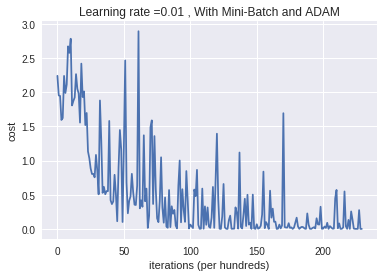

In [117]:
costs = np.squeeze(cst)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(0.01)+" , With Mini-Batch and ADAM")
plt.show()

##Results Observed

** This combination of parameter values gave a really high validation accuracy of nearly 100% with a very less number of epochs of 2300 count**

#Final Results Displayed Below

In [141]:
u = np.zeros((100,3))
u[:,0]=arr[:100,0]
u[:,1]=test[:]

columns=['Input','Prediction','Output']

import pandas as pd
u1 = pd.DataFrame(u,columns=columns)

for i in range(100):
  if u[i][1]==0:
    u1['Output'][i] = u1['Input'][i]
  elif u[i][1]==1:
    u1['Output'][i] = 'Fizz'
  elif u[i][1]==2:
    u1['Output'][i] = 'Buzz'
  elif u[i][1]==3:
    u1['Output'][i] = 'Fizz-Buzz'
u1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying 

,Input,Prediction,Output
0,1.0,0.0,1
1,2.0,0.0,2
2,3.0,1.0,Fizz
3,4.0,0.0,4
4,5.0,2.0,Buzz
5,6.0,1.0,Fizz
6,7.0,0.0,7
7,8.0,0.0,8
8,9.0,1.0,Fizz
9,10.0,2.0,Buzz


                                                                                                                                             **   .................**......................**